<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Electricity" data-toc-modified-id="Electricity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Electricity</a></span></li><li><span><a href="#Natural-Gas" data-toc-modified-id="Natural-Gas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Natural Gas</a></span></li><li><span><a href="#Chilled-Water" data-toc-modified-id="Chilled-Water-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Chilled Water</a></span></li><li><span><a href="#Water" data-toc-modified-id="Water-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Water</a></span></li></ul></li><li><span><a href="#Trend-Analysis" data-toc-modified-id="Trend-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trend Analysis</a></span></li><li><span><a href="#Variation-among-buildings" data-toc-modified-id="Variation-among-buildings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Variation among buildings</a></span></li><li><span><a href="#Read-other-data" data-toc-modified-id="Read-other-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read other data</a></span><ul class="toc-item"><li><span><a href="#EUI" data-toc-modified-id="EUI-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>EUI</a></span></li><li><span><a href="#LADWP" data-toc-modified-id="LADWP-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LADWP</a></span></li><li><span><a href="#Read-sq-feet-information" data-toc-modified-id="Read-sq-feet-information-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Read sq feet information</a></span></li></ul></li><li><span><a href="#Export-tables" data-toc-modified-id="Export-tables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Export tables</a></span></li><li><span><a href="#Joining" data-toc-modified-id="Joining-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Joining</a></span></li><li><span><a href="#Validate-results-for-top-contributers-dropping-and-not-dropping-rows-with-nulls" data-toc-modified-id="Validate-results-for-top-contributers-dropping-and-not-dropping-rows-with-nulls-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validate results for top contributers dropping and not dropping rows with nulls</a></span></li><li><span><a href="#Export-master-file-for-tableau" data-toc-modified-id="Export-master-file-for-tableau-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export master file for tableau</a></span></li><li><span><a href="#Add-Year-and-merge-LADWP-data" data-toc-modified-id="Add-Year-and-merge-LADWP-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Add Year and merge LADWP data</a></span></li><li><span><a href="#Plots-to-be-executed-in-tableau" data-toc-modified-id="Plots-to-be-executed-in-tableau-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plots to be executed in tableau</a></span></li><li><span><a href="#Room" data-toc-modified-id="Room-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Room</a></span></li><li><span><a href="#Resource-Consumption-Over-Years" data-toc-modified-id="Resource-Consumption-Over-Years-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Resource Consumption Over Years</a></span></li><li><span><a href="#Get-building-type-based-on-max-area-by-room-type" data-toc-modified-id="Get-building-type-based-on-max-area-by-room-type-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Get building type based on max area by room type</a></span><ul class="toc-item"><li><span><a href="#Join" data-toc-modified-id="Join-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Join</a></span></li><li><span><a href="#get-sq-feet-values-by-building-type" data-toc-modified-id="get-sq-feet-values-by-building-type-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>get sq feet values by building type</a></span></li></ul></li><li><span><a href="#Get-a-few-stats" data-toc-modified-id="Get-a-few-stats-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Get a few stats</a></span></li><li><span><a href="#Total-stats" data-toc-modified-id="Total-stats-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Total stats</a></span><ul class="toc-item"><li><span><a href="#by-building-name" data-toc-modified-id="by-building-name-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>by building name</a></span></li><li><span><a href="#Stats-by-building-type" data-toc-modified-id="Stats-by-building-type-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Stats by building type</a></span></li><li><span><a href="#Stats-proportion-by-building" data-toc-modified-id="Stats-proportion-by-building-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>Stats proportion by building</a></span></li></ul></li></ul></div>

# Libraries

In [113]:
# Libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

pd.set_option('float_format', '{:f}'.format)

plt.rcParams["figure.figsize"] = (20,5)

# Read data

## Electricity

In [114]:
# Read
df_electricity = pd.read_excel("UPC Utility Data 2018-2021.xlsx", sheet_name="Electricity", skiprows=5, 
                               skipfooter = 6)

df_electricity.drop(0, axis = 0, inplace = True)
df_electricity.rename(columns = {"Bldg #" : "Bldg_no"}, inplace = True)

df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 1 to 222
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bldg_no              222 non-null    float64
 1   Building             222 non-null    object 
 2   Code                 222 non-null    object 
 3   2018-01-01 00:00:00  218 non-null    float64
 4   2018-02-01 00:00:00  218 non-null    float64
 5   2018-03-01 00:00:00  218 non-null    float64
 6   2018-04-01 00:00:00  218 non-null    float64
 7   2018-05-01 00:00:00  218 non-null    float64
 8   2018-06-01 00:00:00  218 non-null    float64
 9   2018-07-01 00:00:00  218 non-null    float64
 10  2018-08-01 00:00:00  218 non-null    float64
 11  2018-09-01 00:00:00  218 non-null    float64
 12  2018-10-01 00:00:00  218 non-null    float64
 13  2018-11-01 00:00:00  219 non-null    float64
 14  2018-12-01 00:00:00  219 non-null    float64
 15  2019-01-01 00:00:00  219 non-null    flo

In [115]:
# Clean
df_electricity.Code.fillna("UNKNOWN", inplace = True) #replace Code NAs with string
df_electricity.fillna(0, inplace = True) # replace consumption NAs with 0
df_electricity["Code"] = df_electricity["Code"].str[:3] # clean codes


In [116]:
# long format
df_elec = pd.melt(df_electricity, id_vars=list(df_electricity.columns)[:3], var_name = "date", value_name = "elec")

display(df_elec.head())
display(df_elec.describe())
display(df_elec.info())

,Bldg_no,Building,Code,date,elec
0,10.000000,Administration Bldg,ADM,2018-01-01,32748.707942
1,1130.000000,ABA Child Care Center,ABA,2018-01-01,0.000000
2,1480.000000,Ahmanson Center,ACB,2018-01-01,104510.783734
3,440.000000,School of Accounting,ACC,2018-01-01,39903.964619
4,11.000000,Bovard Auditorium,ADM,2018-01-01,27775.986979


,Bldg_no,elec
count,10656.000000,10656.000000
mean,1726.932432,58424.171639
std,1303.777093,145875.546137
min,10.000000,-53080.000000
25%,720.000000,608.000000
50%,1450.500000,16993.500000
75%,2620.000000,53269.711692
max,8010.000000,1759271.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Bldg_no   10656 non-null  float64       
 1   Building  10656 non-null  object        
 2   Code      10656 non-null  object        
 3   date      10656 non-null  datetime64[ns]
 4   elec      10656 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 416.4+ KB


None

## Natural Gas

In [117]:
# Read
df_ng = pd.read_excel("UPC Utility Data 2018-2021.xlsx", sheet_name="Natural Gas", skiprows=2, 
                               skipfooter = 3)
df_ng.rename(columns = {"Bldg No." : "Bldg_no"}, inplace = True)
df_ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bldg_no              175 non-null    float64
 1   Bldg Name            175 non-null    object 
 2   Bldg Code            174 non-null    object 
 3   2018-01-01 00:00:00  174 non-null    float64
 4   2018-02-01 00:00:00  174 non-null    float64
 5   2018-03-01 00:00:00  174 non-null    float64
 6   2018-04-01 00:00:00  174 non-null    float64
 7   2018-05-01 00:00:00  162 non-null    float64
 8   2018-06-01 00:00:00  162 non-null    float64
 9   2018-07-01 00:00:00  162 non-null    float64
 10  2018-08-01 00:00:00  162 non-null    float64
 11  2018-09-01 00:00:00  162 non-null    float64
 12  2018-10-01 00:00:00  162 non-null    float64
 13  2018-11-01 00:00:00  162 non-null    float64
 14  2018-12-01 00:00:00  162 non-null    float64
 15  2019-01-01 00:00:00  161 non-null    flo

In [118]:
# Clean
df_ng["Bldg Code"].fillna("UNKNOWN", inplace = True) #replace Code NAs with string
df_ng.fillna(0, inplace = True) # replace consumption NAs with 0
df_ng["Bldg Code"] = df_ng["Bldg Code"].str[:3] # clean codes

In [119]:
# long format
df_ng = pd.melt(df_ng, id_vars=list(df_ng.columns)[:3], var_name = "date", value_name = "ng")

display(df_ng.head())
display(df_ng.describe())
display(df_ng.info())

,Bldg_no,Bldg Name,Bldg Code,date,ng
0,148.000000,Ahmanson Center,ACB,2018-01-01,1975.143820
1,44.000000,School of Accounting,ACC,2018-01-01,1916.081687
2,1.000000,Administration Bldg,ADM,2018-01-01,2962.352707
3,37.000000,Allan Hancock Foundation,AHF,2018-01-01,8073.915488
4,14.000000,Dosan Ahn Chang Ho Family House,AHN,2018-01-01,0.000000


,Bldg_no,ng
count,8400.000000,8400.000000
mean,159.317714,1843.866343
std,113.579582,3306.591551
min,1.000000,-4.000000
25%,65.000000,0.000000
50%,133.000000,447.737418
75%,257.000000,2237.237639
max,623.000000,51803.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Bldg_no    8400 non-null   float64       
 1   Bldg Name  8400 non-null   object        
 2   Bldg Code  8400 non-null   object        
 3   date       8400 non-null   datetime64[ns]
 4   ng         8400 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 328.2+ KB


None

## Chilled Water

In [120]:
# Read
df_cw = pd.read_excel("UPC Utility Data 2018-2021.xlsx", sheet_name="Chilled Water", skiprows=4, 
                               skipfooter = 2)

df_cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Name        69 non-null     object 
 1   BLDG Code            69 non-null     object 
 2   2018-01-01 00:00:00  68 non-null     float64
 3   2018-02-01 00:00:00  68 non-null     float64
 4   2018-03-01 00:00:00  68 non-null     float64
 5   2018-04-01 00:00:00  68 non-null     float64
 6   2018-05-01 00:00:00  68 non-null     float64
 7   2018-06-01 00:00:00  68 non-null     float64
 8   2018-07-01 00:00:00  68 non-null     float64
 9   2018-08-01 00:00:00  68 non-null     float64
 10  2018-09-01 00:00:00  68 non-null     float64
 11  2018-10-01 00:00:00  68 non-null     float64
 12  2018-11-01 00:00:00  68 non-null     float64
 13  2018-12-01 00:00:00  68 non-null     float64
 14  2019-01-01 00:00:00  68 non-null     float64
 15  2019-02-01 00:00:00  68 non-null     float

In [121]:
# Clean

df_cw.fillna(0, inplace = True) # replace consumption NAs with 0
df_cw["BLDG Code"] = df_cw["BLDG Code"].str[:3] # clean codes

In [122]:
# long format
df_cw = pd.melt(df_cw, id_vars=list(df_cw.columns)[:2], var_name = "date", value_name = "cw")

display(df_cw.head())
display(df_cw.describe())
display(df_cw.info())

,Building Name,BLDG Code,date,cw
0,Ahmanson Center for Biological Research,ACB,2018-01-01,39668.239375
1,School of Accounting,ACC,2018-01-01,9332.927813
2,Bovard Administration Building,ADM,2018-01-01,19062.859063
3,Allan Hancock Foundation,AHF,2018-01-01,14604.468125
4,Alumni House,ALM,2018-01-01,8556.000000


,cw
count,3312.000000
mean,28119.107063
std,37570.052309
min,0.000000
25%,6538.907527
50%,16458.408944
75%,33779.550000
max,336420.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Building Name  3312 non-null   object        
 1   BLDG Code      3312 non-null   object        
 2   date           3312 non-null   datetime64[ns]
 3   cw             3312 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 103.6+ KB


None

## Water

In [123]:
# Read
df_water = pd.read_excel("UPC Utility Data 2018-2021.xlsx", sheet_name="Water", skiprows=4, 
                               skipfooter = 11)

df_water.drop(0, axis = 0, inplace = True)
df_water.rename(columns = {"Bldg #" : "Bldg_no"}, inplace = True)
df_water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bldg_no              187 non-null    float64
 1   Code                 187 non-null    object 
 2   Building             189 non-null    object 
 3   2018-01-01 00:00:00  185 non-null    float64
 4   2018-02-01 00:00:00  185 non-null    float64
 5   2018-03-01 00:00:00  185 non-null    float64
 6   2018-04-01 00:00:00  185 non-null    float64
 7   2018-05-01 00:00:00  164 non-null    float64
 8   2018-06-01 00:00:00  164 non-null    float64
 9   2018-07-01 00:00:00  164 non-null    float64
 10  2018-08-01 00:00:00  164 non-null    float64
 11  2018-09-01 00:00:00  164 non-null    float64
 12  2018-10-01 00:00:00  164 non-null    float64
 13  2018-11-01 00:00:00  164 non-null    float64
 14  2018-12-01 00:00:00  163 non-null    float64
 15  2019-01-01 00:00:00  163 non-null    flo

In [124]:
# Clean

df_water.loc[len(df_water.index)] = list(df_water.iloc[187:189, :].sum())
df_water.loc[189, "Building"] = "3401 S Hope St" # Cleaning last two rows
df_water.loc[189, "Code"] = "UNKNOWN" # Cleaning last two rows
df_water.drop(188, axis = 0, inplace = True) # Cleaning last two rows
df_water["Code"].fillna("UNKNOWN", inplace = True) #replace Code NAs with string
df_water["Code"] = df_water["Code"].str[:3] # clean codes
df_water.fillna(0, inplace = True) # replace consumption NAs with 0

In [125]:
# long format
df_water = pd.melt(df_water, id_vars=list(df_water.columns)[:3], var_name = "date", value_name = "water")

# Convert water to gallons
df_water["water"] = df_water["water"]*748.052

display(df_water.head())
display(df_water.describe())
display(df_water.info())

,Bldg_no,Code,Building,date,water
0,1.000000,ADM,Administration Bldg,2018-01-01,126869.706599
1,113.000000,ABA,ABA Child Care Center,2018-01-01,0.000000
2,11.000000,ABX,Anna Bing Arnold Child Care Center,2018-01-01,0.000000
3,148.000000,ACB,Ahmanson Center,2018-01-01,456678.245940
4,44.000000,ACC,School of Accounting,2018-01-01,78108.721088


,Bldg_no,water
count,9024.000000,9024.000000
mean,172.486702,126224.092618
std,135.871936,302657.520084
min,0.000000,-3853420.070196
25%,70.250000,4872.649370
50%,137.000000,51663.486483
75%,264.250000,132573.861122
max,801.000000,16932186.942080


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Bldg_no   9024 non-null   float64       
 1   Code      9024 non-null   object        
 2   Building  9024 non-null   object        
 3   date      9024 non-null   datetime64[ns]
 4   water     9024 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 352.6+ KB


None

# Trend Analysis

In [126]:
# electricity total
df_elec_total = df_elec.groupby("date").sum()[["elec"]]

<AxesSubplot:xlabel='date'>

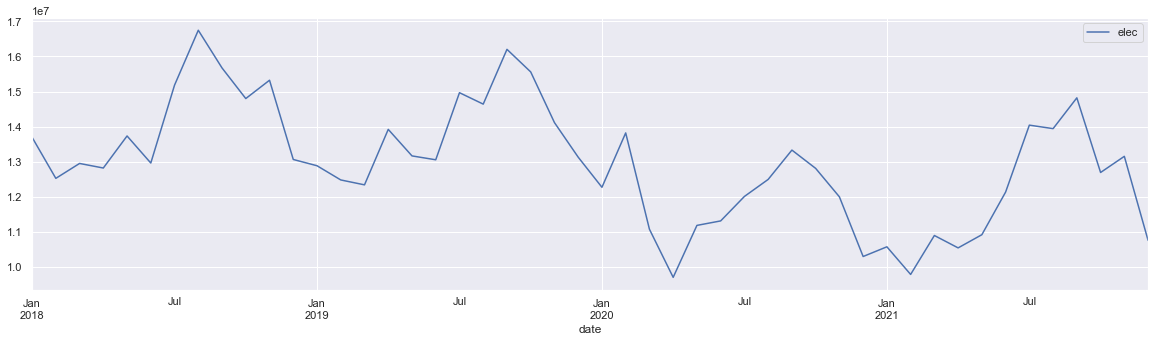

In [127]:
df_elec_total.plot()

In [128]:
# chilled water total
df_cw_total = df_cw.groupby("date").sum()[["cw"]]

<AxesSubplot:xlabel='date'>

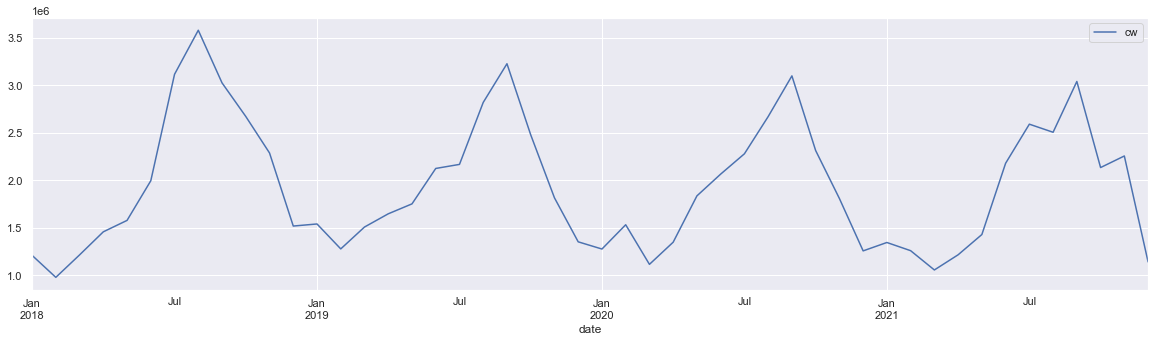

In [129]:
df_cw_total.plot()

In [130]:
# Natural gas total
df_ng_total = df_ng.groupby("date").sum()[["ng"]]

<AxesSubplot:xlabel='date'>

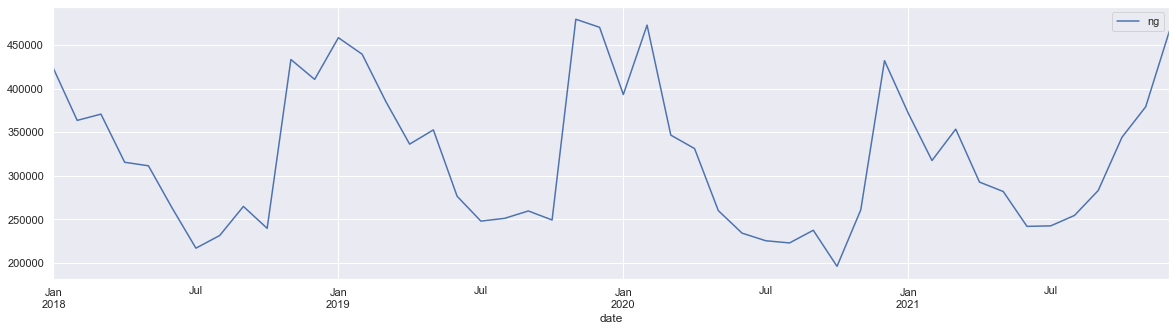

In [131]:
df_ng_total.plot()

In [132]:
df_water_total = df_water.groupby("date").sum()[["water"]]

<AxesSubplot:xlabel='date'>

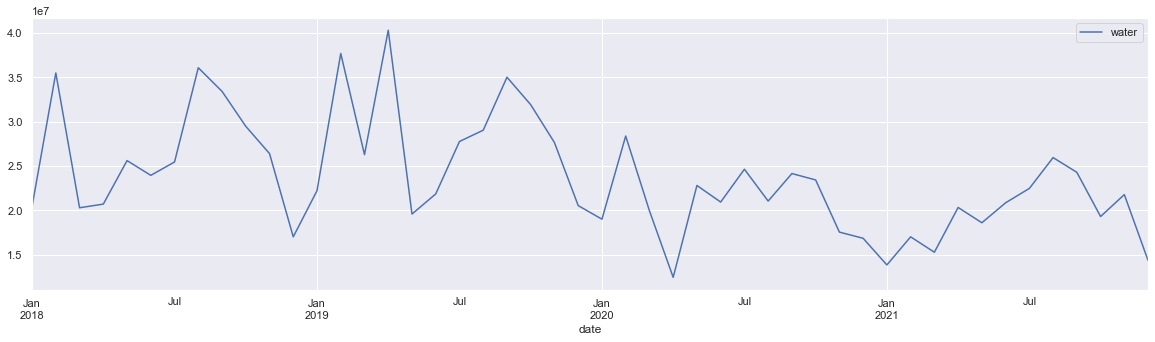

In [133]:
df_water_total.plot()

# Variation among buildings

In [134]:
df_cw

,Building Name,BLDG Code,date,cw
0,Ahmanson Center for Biological Research,ACB,2018-01-01,39668.239375
1,School of Accounting,ACC,2018-01-01,9332.927813
2,Bovard Administration Building,ADM,2018-01-01,19062.859063
3,Allan Hancock Foundation,AHF,2018-01-01,14604.468125
4,Alumni House,ALM,2018-01-01,8556.000000
...,...,...,...,...
3307,VPD,VPD,2021-12-01,9047.893548
3308,Watt Hall of Architecture,WAH,2021-12-01,198.764516
3309,Science Hall,ZHS,2021-12-01,41428.345161
3310,Michelson Center for Convergent Bioscience,MCB,2021-12-01,80703.870968


In [135]:
# Check table codes

## electricity
display(df_elec["Code"].unique())
display(df_cw["BLDG Code"].unique())
display(df_water["Code"].unique())
display(df_ng["Bldg Code"].unique())

array(['ADM', 'ABA', 'ACB', 'ACC', 'AES', 'AHF', 'AHN', 'ALM', 'ANN',
       'ASC', 'ASI', 'BCI', 'BDF', 'BDX', 'BHE', 'BIT', 'BKF', 'BKS',
       'BMH', 'BRI', 'BSR', 'CAL', 'CAS', 'CDF', 'CEM', 'CFH', 'CFX',
       'CLH', 'COH', 'COL', 'COM', 'CTC', 'CWO', 'CWT', 'DCC', 'DEN',
       'DML', 'DMT', 'DMV', 'DNI', 'DRB', 'DRC', 'DXM', 'ECT', 'EEB',
       'EGG', 'ELB', 'EPS', 'ESH', 'EVK', 'FAC', 'FAM', 'FIG', 'FLT',
       'FMH', 'FPM', 'GAP', 'GEC', 'GEH', 'GER', 'GEX', 'GFS', 'GPC',
       'HAR', 'HED', 'HER', 'HEX', 'HHR', 'HNB', 'HOH', 'HRC', 'HRH',
       'HSH', 'HSS', 'IMF', 'IMS', 'IRC', 'IYH', 'JEF', 'JEP', 'JFF',
       'JHH', 'JMC', 'JKP', 'KAB', 'KAP', 'KCH', 'KDC', 'KER', 'KOH',
       'KSH', 'LAW', 'LHI', 'LJS', 'LPB', 'LRC', 'LTS', 'LUC', 'LVL',
       'MAC', 'MCB', 'MCC', 'MHP', 'MNS', 'MRF', 'MTX', 'MUS', 'NCT',
       'OCW', 'OHE', 'OMP', 'ONE', 'PCE', 'PED', 'PHE', 'PIC', 'PKS',
       'POA', 'PPG', 'PPU', 'PRB', 'PSA', 'PSB', 'PSD', 'PSX', 'PTD',
       'PUS', 'RAN',

array(['ACB', 'ACC', 'ADM', 'AHF', 'ALM', 'ANN', 'ASC', 'BHE', 'BIT',
       'BKS', 'BMH', 'BRI', 'CEM', 'DML', 'EEB', 'GER', 'GFS', 'HAR',
       'HED', 'HER', 'HNB', 'HOH', 'IRC', 'IYH', 'JFF', 'JHH', 'JKP',
       'JMC', 'KAP', 'KDC', 'LAW', 'LHI', 'LJS', 'LPB', 'LTS', 'MHP',
       'MUS', 'NCT', 'OCW', 'OHE', 'PCE', 'PHE', 'PRB', 'RGL', 'RHM',
       'RRI', 'RTH', 'SAL', 'SCA', 'SCB', 'SCC', 'SCE', 'SCI', 'SCX',
       'SHS', 'SLH', 'SSC', 'SSL', 'STO', 'STU', 'TCC', 'TGF', 'VHE',
       'VPD', 'WAH', 'ZHS', 'MCB', 'DRB'], dtype=object)

array(['ADM', 'ABA', 'ABX', 'ACB', 'ACC', 'AHF', 'AHN', 'ALM', 'ANN',
       'ASC', 'ASI', 'BDF', 'BHE', 'BIT', 'BKF', 'BKS', 'BMH', 'BRI',
       'BSR', 'CAL', 'CAS', 'CDF', 'CEM', 'CFH', 'CIC', 'CLN', 'COH',
       'COL', 'COM', 'CRC', 'CWO', 'CWT', 'DCC', 'DEN', 'DML', 'DMT',
       'DMV', 'DNI', 'DRB', 'DRC', 'DXM', 'ECT', 'EDL', 'EEB', 'EGG',
       'ELB', 'EPS', 'ESH', 'EVK', 'FAC', 'FAM', 'FIG', 'FLT', 'FMH',
       'FWH', 'GEC', 'GEH', 'GER', 'GFS', 'GPC', 'HAR', 'HED', 'HER',
       'HEX', 'HHR', 'HNB', 'HOH', 'HRC', 'HRH', 'HSH', 'HSS', 'IMF',
       'IMS', 'IRC', 'IYH', 'JEF', 'JEP', 'JFF', 'JHH', 'JKP', 'JMC',
       'KAB', 'KAP', 'KCH', 'KDC', 'KER', 'KOH', 'LAW', 'LHI', 'LJS',
       'LRC', 'LTS', 'LUC', 'LVL', 'MAC', 'MCB', 'MCC', 'MHC', 'MHP',
       'MRC', 'MRF', 'MTX', 'MUS', 'NBC', 'NCT', 'OCW', 'OHE', 'ONE',
       'PCE', 'PED', 'PHE', 'PIC', 'PKS', 'POA', 'PRB', 'PSA', 'PSB',
       'PSD', 'PSX', 'PTD', 'PUS', 'RAN', 'REG', 'RGL', 'RHM', 'ROY',
       'RRB', 'RRI',

array(['ACB', 'ACC', 'ADM', 'AHF', 'AHN', 'ALM', 'ANN', 'ASC', 'ASI',
       'BDF', 'BHE', 'BIT', 'BKS', 'BMH', 'BRI', 'BSR', 'CAL', 'CAS',
       'CDF', 'CEM', 'CFH', 'CIC', 'COH', 'COL', 'COM', 'CRC', 'CSS',
       'CTV', 'CWO', 'CWT', 'DCC', 'DEN', 'DML', 'DMT', 'DNI', 'DRB',
       'DRC', 'DXM', 'ECT', 'EEB', 'EGG', 'ESH', 'EVK', 'FAC', 'FAM',
       'FIG', 'FMH', 'FWH', 'GEC', 'GEH', 'GER', 'GFS', 'HAR', 'HED',
       'HER', 'HEX', 'HNB', 'HOH', 'HRC', 'HRH', 'HSH', 'HSS', 'IMS',
       'IRC', 'IYH', 'JEF', 'JEP', 'JFF', 'JHH', 'JKP', 'JMC', 'JWS',
       'KAB', 'KAP', 'KCH', 'KDC', 'KER', 'KOH', 'KSH', 'LAW', 'LHI',
       'LJS', 'LPB', 'LRC', 'LTS', 'LUC', 'LVL', 'MAC', 'MCB', 'MHC',
       'MHP', 'MRC', 'MRF', 'MTX', 'MUS', 'NBC', 'NCT', 'OCW', 'OHE',
       'ONE', 'PCE', 'PED', 'PHE', 'PIC', 'PKS', 'PRB', 'PSA', 'PSB',
       'PSD', 'PSX', 'PTD', 'RAN', 'REG', 'RGL', 'RHM', 'RRI', 'ROY',
       'RRB', 'RTH', 'RZC', 'SAL', 'SCA', 'SCB', 'SCC', 'SCD', 'SCE',
       'SCI', 'SCX',

In [136]:
# Display lengths
print("Length codes elec",df_elec["Code"].nunique() )
print("Length codes chilled water",df_cw["BLDG Code"].nunique())
print("Length codes water",df_water["Code"].nunique())
print("Length codes natural gas", df_ng["Bldg Code"].nunique())

Length codes elec 184
Length codes chilled water 68
Length codes water 178
Length codes natural gas 166


# Read other data

## EUI

In [137]:
# Read EUI

df_eui = pd.read_excel("UPC Reference Data.xlsx", sheet_name="EnergyStar", skiprows=5, na_values="Not Available")
df_eui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Property Id                            157 non-null    int64  
 1   Property Name                          157 non-null    object 
 2   Parent Property Id                     157 non-null    object 
 3   Parent Property Name                   157 non-null    object 
 4   Year Ending                            157 non-null    object 
 5   ENERGY STAR Score                      49 non-null     float64
 6   Source EUI (kBtu/ft²)                  154 non-null    float64
 7   Site EUI (kBtu/ft²)                    154 non-null    float64
 8   Primary Property Type - Self Selected  157 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 11.2+ KB


In [138]:
# Clean
df_eui["Code"] = df_eui["Property Name"].str.extract("\(([A-Z][A-Z][A-Z])\)") # extract codes from property name
df_eui.rename(columns = {"Primary Property Type - Self Selected": "Primary_property",
                        "Source EUI (kBtu/ft²)": "Source_EUI",
                        "Site EUI (kBtu/ft²)": "Site_EUI"}, inplace = True)
df_eui["Source_EUI"].fillna(0, inplace = True)
df_eui["Site_EUI"].fillna(0, inplace = True)

In [139]:
# display

display(df_eui.head())
display(df_eui.info())

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,ENERGY STAR Score,Source_EUI,Site_EUI,Primary_property,Code
0,11984785,A.C Allen Cowlings & Illium Residential Hall (...,12420433,USC Campus Parent,2020-12-31 00:00:00,NaN,84.500000,49.800000,Residence Hall/Dormitory,CRC
1,6794046,Ahmanson Center For Biological Research (ACB),12420433,USC Campus Parent,2020-12-31 00:00:00,NaN,863.100000,528.200000,College/University,ACB
2,6808919,Albert S. Raubenheimer Music Faculty Memorial ...,12420433,USC Campus Parent,2020-12-31 00:00:00,NaN,139.000000,86.100000,College/University,MUS
3,6798137,Allan Hancock Foundation (AHF),12420433,USC Campus Parent,2020-12-31 00:00:00,NaN,127.900000,112.000000,College/University,AHF
4,11933664,Annenberg House (ANH),12420433,USC Campus Parent,2021-12-31 00:00:00,100.000000,10.400000,3.700000,Residence Hall/Dormitory,ANH


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property Id           157 non-null    int64  
 1   Property Name         157 non-null    object 
 2   Parent Property Id    157 non-null    object 
 3   Parent Property Name  157 non-null    object 
 4   Year Ending           157 non-null    object 
 5   ENERGY STAR Score     49 non-null     float64
 6   Source_EUI            157 non-null    float64
 7   Site_EUI              157 non-null    float64
 8   Primary_property      157 non-null    object 
 9   Code                  148 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 12.4+ KB


None

<AxesSubplot:xlabel='Primary_property'>

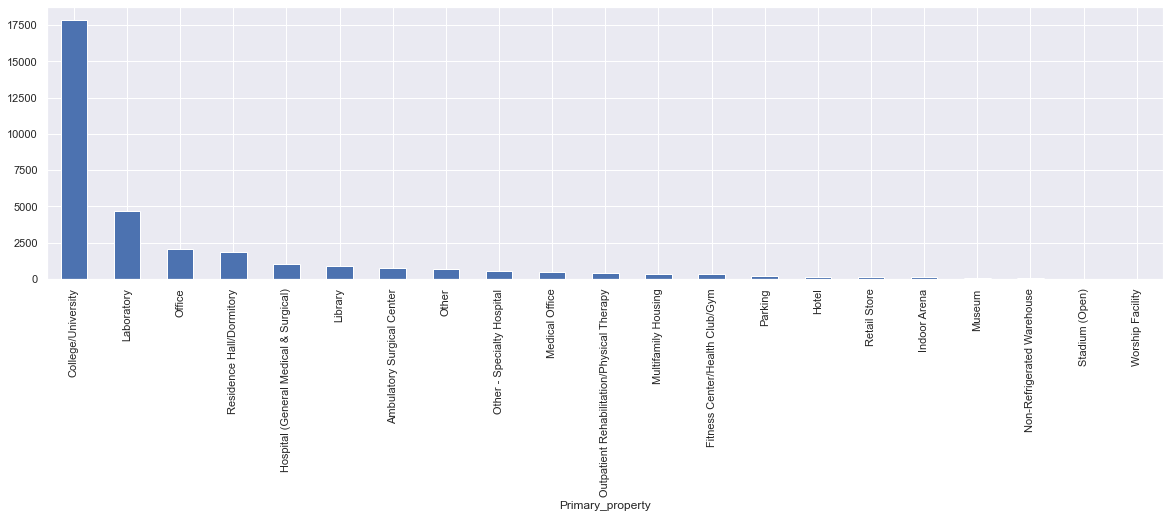

In [140]:
# Plot by primary property type

df_eui.groupby("Primary_property").sum()["Source_EUI"].sort_values(ascending = False).plot(kind = "bar")

<AxesSubplot:xlabel='Code'>

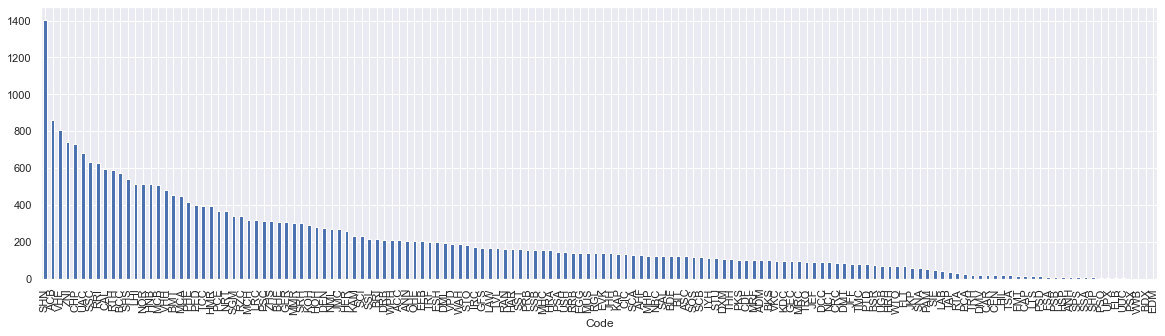

In [141]:
# Plot by code

df_eui.groupby("Code").sum()["Source_EUI"].sort_values(ascending = False).plot(kind = "bar")

<AxesSubplot:xlabel='Code'>

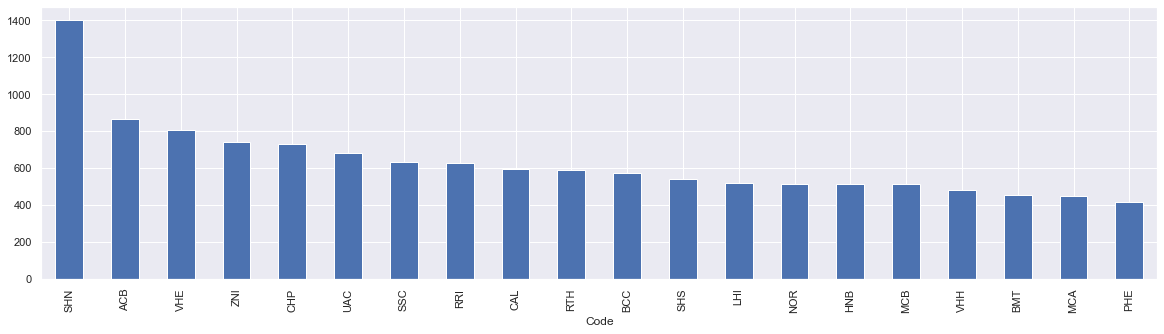

In [142]:
# Plot by code

df_eui.groupby("Code").sum()["Source_EUI"].sort_values(ascending = False).head(20).plot(kind = "bar")

## LADWP

In [143]:
# Ladwp
df_ladwp = pd.read_excel("UPC Reference Data.xlsx", sheet_name = "LADWP Carbon Intensity")
df_ladwp = df_ladwp.iloc[:, :2]

df_ladwp.rename(columns = {"LADWP Carbon Intensity (kg eCO2/kWh)": "LADWP_Carbon_Intensity"}, inplace = True)

display(df_ladwp)
display(df_ladwp.info())

,Year,LADWP_Carbon_Intensity
0,2014,0.500000
1,2015,0.510000
2,2016,0.380000
3,2017,0.350000
4,2018,0.350000
5,2019,0.350000
6,2020,0.260000
7,2021,0.260000
8,2022,0.238792
9,2023,0.219313


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    47 non-null     int64  
 1   LADWP_Carbon_Intensity  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


None

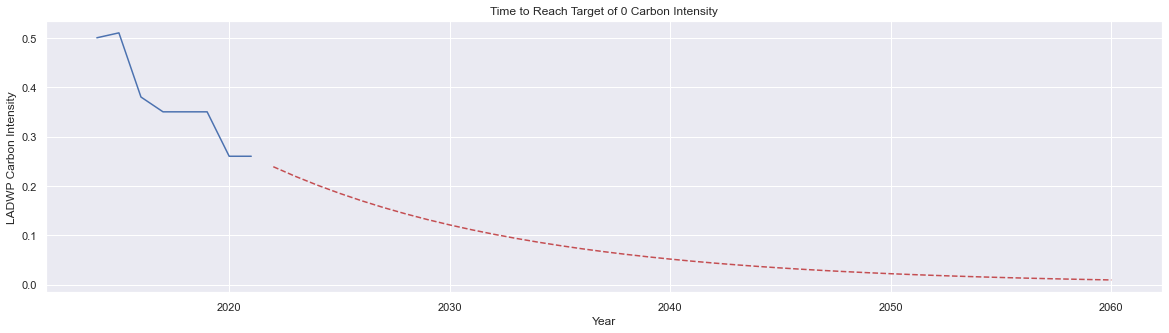

In [144]:
plt.plot(df_ladwp.loc[:7, "Year"], df_ladwp.loc[:7, "LADWP_Carbon_Intensity"], ls = "-", color = "b")
plt.plot(df_ladwp.loc[8:, "Year"], df_ladwp.loc[8:, "LADWP_Carbon_Intensity"], ls = "--", color = "r")
plt.xlabel("Year")
plt.ylabel("LADWP Carbon Intensity")
plt.title("Time to Reach Target of 0 Carbon Intensity")
plt.savefig('Carbon_Intensity.png', bbox_inches='tight')
plt.show()



## Read sq feet information

In [145]:
# Read data
df_area = pd.read_excel("UPC Reference Data.xlsx", sheet_name="Total Sq Feet")
df_area = df_area.sort_values(by = "Sq_feet", ascending = False)

display(df_area.info())
display(df_area.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 339 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BUILDING  372 non-null    object
 1   Sq_feet   372 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ KB


None

,BUILDING,Sq_feet
339,UPX,484941
337,UNH,429765
335,UHP,426853
256,PSX,280560
42,CAL,275026


[]

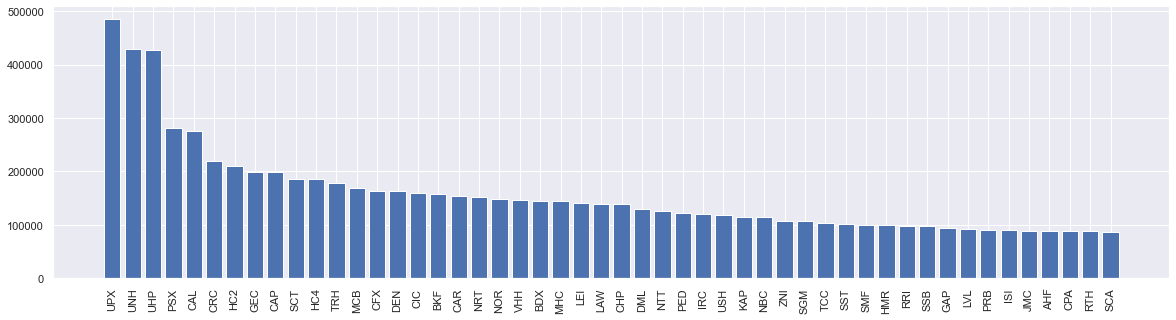

In [146]:
plt.bar(df_area["BUILDING"].head(50), df_area["Sq_feet"].head(50))
plt.xticks(rotation = 90)
plt.plot()

# Export tables

In [147]:
df_elec.to_excel("electricity.xlsx")
df_cw.to_excel("chilled_water.xlsx")
df_water.to_excel("water.xlsx")
df_ng.to_excel("natural_gas.xlsx")
df_eui.to_excel("eui.xlsx")

# Joining

In [148]:
# Display lengths again
print("Length codes elec",df_elec["Code"].nunique() )
print("Length codes chilled water",df_cw["BLDG Code"].nunique())
print("Length codes water",df_water["Code"].nunique())
print("Length codes natural gas", df_ng["Bldg Code"].nunique())
print("Length codes EUI", df_eui["Code"].nunique())

Length codes elec 184
Length codes chilled water 68
Length codes water 178
Length codes natural gas 166
Length codes EUI 148


In [149]:
# electricity agg
df1 = df_elec.groupby(["Code", "date"]).agg({"Bldg_no": "max", "elec": "sum"}).reset_index().drop("Bldg_no", axis = 1)
df1

,Code,date,elec
0,ABA,2018-01-01,0.000000
1,ABA,2018-02-01,0.000000
2,ABA,2018-03-01,0.000000
3,ABA,2018-04-01,0.000000
4,ABA,2018-05-01,0.000000
...,...,...,...
8827,ZHS,2021-08-01,123464.000000
8828,ZHS,2021-09-01,156754.000000
8829,ZHS,2021-10-01,138240.000000
8830,ZHS,2021-11-01,180307.000000


In [150]:
# natural gas agg
df2 = df_ng.groupby(["Bldg Code", "date"]).agg({"ng": "sum"}).reset_index()
df2

,Bldg Code,date,ng
0,ACB,2018-01-01,1975.143820
1,ACB,2018-02-01,2134.239967
2,ACB,2018-03-01,2228.790216
3,ACB,2018-04-01,1825.046115
4,ACB,2018-05-01,1961.614647
...,...,...,...
7963,ZHS,2021-08-01,7001.755969
7964,ZHS,2021-09-01,7585.189603
7965,ZHS,2021-10-01,8936.251492
7966,ZHS,2021-11-01,9836.396757


In [151]:
# water agg

df3 = df_water.groupby(["Code", "date"]).agg({"water": "sum"}).reset_index()
df3

,Code,date,water
0,ABA,2018-01-01,0.000000
1,ABA,2018-02-01,0.000000
2,ABA,2018-03-01,0.000000
3,ABA,2018-04-01,0.000000
4,ABA,2018-05-01,0.000000
...,...,...,...
8539,ZHS,2021-08-01,99839.540022
8540,ZHS,2021-09-01,92352.839970
8541,ZHS,2021-10-01,76072.024779
8542,ZHS,2021-11-01,58454.872158


In [152]:
# chilled water agg
df4 = df_cw.groupby(["BLDG Code", "date"]).agg({"cw": "sum"}).reset_index()
df4

,BLDG Code,date,cw
0,ACB,2018-01-01,39668.239375
1,ACB,2018-02-01,48959.651034
2,ACB,2018-03-01,32505.007241
3,ACB,2018-04-01,44916.662069
4,ACB,2018-05-01,48345.570000
...,...,...,...
3259,ZHS,2021-08-01,81479.821935
3260,ZHS,2021-09-01,104125.888000
3261,ZHS,2021-10-01,74456.206452
3262,ZHS,2021-11-01,83077.137000


In [153]:
# join
temp = pd.merge(df1, df2, how = "left", left_on = ["Code", "date"], right_on = ["Bldg Code", "date"])

temp = pd.merge(temp, df3, how = "left", left_on = ["Code", "date"], right_on = ["Code", "date"])

temp = pd.merge(temp, df4, how = "left", left_on = ["Code", "date"], right_on = ["BLDG Code", "date"])

temp = pd.merge(temp, df_area, how = "left", left_on = ["Code"], right_on = ["BUILDING"])

display(temp)

,Code,date,elec,Bldg Code,ng,water,BLDG Code,cw,BUILDING,Sq_feet
0,ABA,2018-01-01,0.000000,NaN,NaN,0.000000,NaN,NaN,ABA,3338.000000
1,ABA,2018-02-01,0.000000,NaN,NaN,0.000000,NaN,NaN,ABA,3338.000000
2,ABA,2018-03-01,0.000000,NaN,NaN,0.000000,NaN,NaN,ABA,3338.000000
3,ABA,2018-04-01,0.000000,NaN,NaN,0.000000,NaN,NaN,ABA,3338.000000
4,ABA,2018-05-01,0.000000,NaN,NaN,0.000000,NaN,NaN,ABA,3338.000000
...,...,...,...,...,...,...,...,...,...,...
8827,ZHS,2021-08-01,123464.000000,ZHS,7001.755969,99839.540022,ZHS,81479.821935,ZHS,83252.000000
8828,ZHS,2021-09-01,156754.000000,ZHS,7585.189603,92352.839970,ZHS,104125.888000,ZHS,83252.000000
8829,ZHS,2021-10-01,138240.000000,ZHS,8936.251492,76072.024779,ZHS,74456.206452,ZHS,83252.000000
8830,ZHS,2021-11-01,180307.000000,ZHS,9836.396757,58454.872158,ZHS,83077.137000,ZHS,83252.000000


In [154]:
# clean

df_agg = temp.drop(["Bldg Code", "BLDG Code", "BUILDING"], axis = 1)
display(df_agg)
display(df_agg.info())

,Code,date,elec,ng,water,cw,Sq_feet
0,ABA,2018-01-01,0.000000,NaN,0.000000,NaN,3338.000000
1,ABA,2018-02-01,0.000000,NaN,0.000000,NaN,3338.000000
2,ABA,2018-03-01,0.000000,NaN,0.000000,NaN,3338.000000
3,ABA,2018-04-01,0.000000,NaN,0.000000,NaN,3338.000000
4,ABA,2018-05-01,0.000000,NaN,0.000000,NaN,3338.000000
...,...,...,...,...,...,...,...
8827,ZHS,2021-08-01,123464.000000,7001.755969,99839.540022,81479.821935,83252.000000
8828,ZHS,2021-09-01,156754.000000,7585.189603,92352.839970,104125.888000,83252.000000
8829,ZHS,2021-10-01,138240.000000,8936.251492,76072.024779,74456.206452,83252.000000
8830,ZHS,2021-11-01,180307.000000,9836.396757,58454.872158,83077.137000,83252.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8832 entries, 0 to 8831
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Code     8832 non-null   object        
 1   date     8832 non-null   datetime64[ns]
 2   elec     8832 non-null   float64       
 3   ng       7392 non-null   float64       
 4   water    7920 non-null   float64       
 5   cw       3264 non-null   float64       
 6   Sq_feet  7248 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 552.0+ KB


None

# Validate results for top contributers dropping and not dropping rows with nulls

**We use -1 to fill na's since we don't want infinity values when divided. We only want to concentrate on top values for visualization so it won't affect our results much**

In [155]:
# Per sq feet measures averaged across years


# dropping nulls

df_agg1 = df_agg.dropna()

print("Per sq feet measures")

# result dataframe
df_order1 = pd.DataFrame(columns = ["elec", "ng", "cw", "water"])


# loop
for col in ["elec", "ng", "water", "cw"]:
    df_agg1[col + "_per_sqft"] = df_agg1[col]/df_agg1["Sq_feet"]
    df_order1[col] = df_agg1.groupby("Code").mean().sort_values(by = col + "_per_sqft",
                                                                ascending = False).reset_index().Code.head(20)

# show result: top 20

display(df_order1)


# not dropping nulls


df_agg2 = df_agg.fillna({"elec": 0,
                        "ng" : 0,
                        "cw": 0,
                        "water": 0,
                        "Sq_feet": -1})

# result dataframe
df_order2 = pd.DataFrame(columns = ["elec", "ng", "cw", "water"])


# loop
for col in ["elec", "ng", "water", "cw"]:
    df_agg2[col + "_per_sqft"] = df_agg2[col]/df_agg2["Sq_feet"]
    df_order2[col] = df_agg2.groupby("Code").mean().sort_values(by = col + "_per_sqft",
                                                                ascending = False).reset_index().Code.head(20)

# show result: top 20
display(df_order2)


Per sq feet measures


<ipython-input-155-b69a485716fe>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg1[col + "_per_sqft"] = df_agg1[col]/df_agg1["Sq_feet"]


,elec,ng,cw,water
0,ACB,RRI,ACB,ACB
1,VHE,LHI,HNB,PCE
2,LHI,PCE,ALM,OCW
3,RRI,HER,RRI,LJS
4,SSC,TCC,RTH,HED
5,TCC,ZHS,OHE,CEM
6,PHE,SSC,BRI,SSC
7,RTH,GER,PHE,RHM
8,MCB,ACB,SSC,GER
9,SHS,MCB,SHS,BHE


,elec,ng,cw,water
0,UVO,UVO,ACB,KCH
1,PSA,RRI,HNB,UVO
2,EPS,LHI,ALM,ACB
3,SHP,KCH,RRI,ABA
4,UPV,LRC,RTH,PCE
5,ACB,PCE,OHE,COL
6,CAL,UAC,BRI,BDF
7,VHE,HER,PHE,ONE
8,LHI,TCC,SSC,OCW
9,RRI,ZHS,SHS,LJS


In [156]:
print("Whole measures")

# Whole values averaged across years

# dropping nulls

df_agg1 = df_agg.dropna()

# result dataframe
df_order3 = pd.DataFrame(columns = ["elec", "ng", "cw", "water"])


# loop
for col in ["elec", "ng", "water", "cw"]:
    df_order3[col] = df_agg1.groupby("Code").mean().sort_values(by = col,
                                                                ascending = False).reset_index().Code.head(20)

# show result: top 20

display(df_order3)



# not dropping nulls
df_agg2 = df_agg.fillna({"elec": 0,
                        "ng" : 0,
                        "cw": 0,
                        "water": 0,
                        "Sq_feet": -1})

# result dataframe
df_order4 = pd.DataFrame(columns = ["elec", "ng", "cw", "water"])


# loop
for col in ["elec", "ng", "water", "cw"]:
    df_order4[col] = df_agg2.groupby("Code").mean().sort_values(by = col,
                                                                ascending = False).reset_index().Code.head(20)

# show result: top 20
display(df_order4)

Whole measures


,elec,ng,cw,water
0,MCB,RRI,MCB,ACB
1,TCC,MCB,RRI,IRC
2,RRI,TCC,RTH,AHF
3,VHE,ZHS,HNB,MCB
4,RTH,IRC,JMC,SSC
5,SSC,HER,OHE,RRI
6,DML,RTH,SSC,RTH
7,LAW,SSC,ACB,GER
8,AHF,JMC,TCC,ZHS
9,JMC,PRB,ZHS,KAP


,elec,ng,cw,water
0,CAL,UVO,MCB,CAL
1,UVO,RRI,RRI,GEC
2,PSA,MCB,RTH,PED
3,MCB,TCC,HNB,UVO
4,GEC,SGM,JMC,ACB
5,PED,LRC,OHE,IRC
6,TCC,ZHS,SSC,SGM
7,RRI,GEC,ACB,AHF
8,DEN,IRC,TCC,MCB
9,VHE,PED,ZHS,DEN


**Ideally, shouldn't remove rows. Also, per sq feet provides more accurate insight. Checking if we have sq feet values for top whole measures**

In [157]:
# Checking availability of sq feet

df_order4.isin(list(df_area["BUILDING"]))



,elec,ng,cw,water
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [158]:
# Checking availability table wise
print("Unique Codes present:", len(df_agg.Code.unique()))
print("Codes for which we have sq feet:", df_agg.groupby("Code").sum().reset_index()[["Code"]].isin(list(df_area["BUILDING"])).sum())

Unique Codes present: 184
Codes for which we have sq feet: Code    151
dtype: int64


**Given the proportion, we can use sq feet values**

# Export master file for tableau

In [159]:
# view agg
df_agg

,Code,date,elec,ng,water,cw,Sq_feet
0,ABA,2018-01-01,0.000000,NaN,0.000000,NaN,3338.000000
1,ABA,2018-02-01,0.000000,NaN,0.000000,NaN,3338.000000
2,ABA,2018-03-01,0.000000,NaN,0.000000,NaN,3338.000000
3,ABA,2018-04-01,0.000000,NaN,0.000000,NaN,3338.000000
4,ABA,2018-05-01,0.000000,NaN,0.000000,NaN,3338.000000
...,...,...,...,...,...,...,...
8827,ZHS,2021-08-01,123464.000000,7001.755969,99839.540022,81479.821935,83252.000000
8828,ZHS,2021-09-01,156754.000000,7585.189603,92352.839970,104125.888000,83252.000000
8829,ZHS,2021-10-01,138240.000000,8936.251492,76072.024779,74456.206452,83252.000000
8830,ZHS,2021-11-01,180307.000000,9836.396757,58454.872158,83077.137000,83252.000000


In [160]:
# fill na
df_agg.fillna({"elec": 0,
              "ng": 0,
              "cw": 0,
              "Sq_feet": -1}, inplace = True)

In [161]:
# per sq feet usage
for col in ["elec", "ng", "water", "cw"]:
    df_agg[col + "_per_sqft"] = df_agg[col]/df_agg["Sq_feet"]


# Add Year and merge LADWP data

In [162]:
# get year from dates
df_agg["year"] = df_agg.date.dt.year

In [163]:
df_new = pd.merge(df_agg, df_ladwp, how = "right", left_on = "year", right_on = "Year")

In [164]:
df_new.fillna({"Code": "Novalue",
              "date" : 0,
              "elec": 0,
              "ng": 0,
              "water":0,
              "cw":0,
              "Sq_feet": -1,
              "elec_per_sqft": 0,
              "ng_per_sqft": 0,
              "water_per_sqft":0,
               "cw_per_sqft":0,
               "year": 0
              }, inplace = True)

df_new.drop("year", axis = 1, inplace = True)

In [165]:
df_new

,Code,date,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity
0,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2014,0.500000
1,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2015,0.510000
2,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2016,0.380000
3,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2017,0.350000
4,ABA,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3338.000000,0.000000,0.000000,0.000000,0.000000,2018,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2056,0.013231
8871,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2057,0.012151
8872,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2058,0.011160
8873,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2059,0.010250


In [166]:
df_new.to_excel("Master.xlsx")

# Plots to be executed in tableau

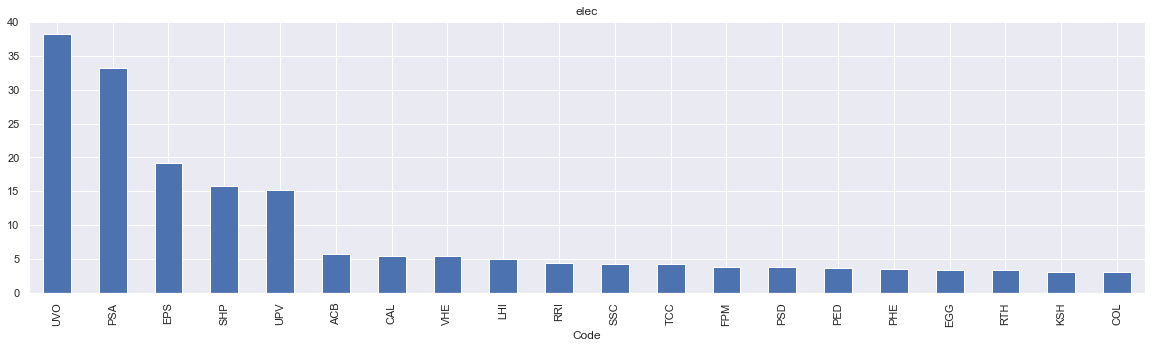

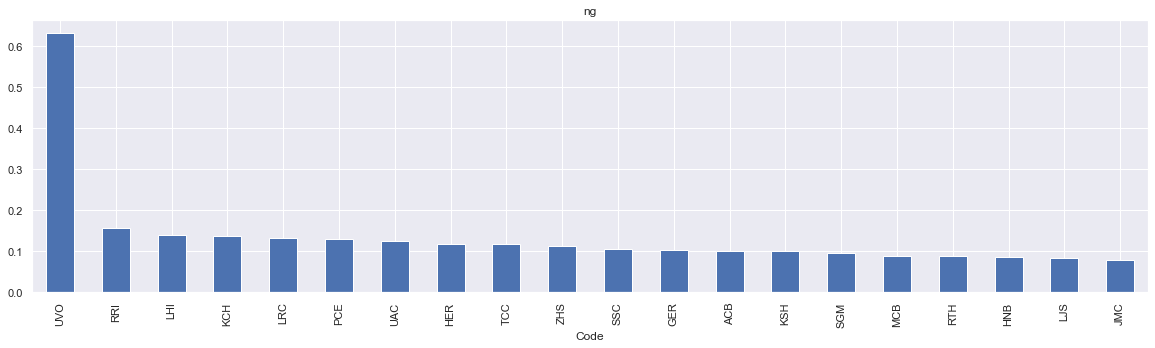

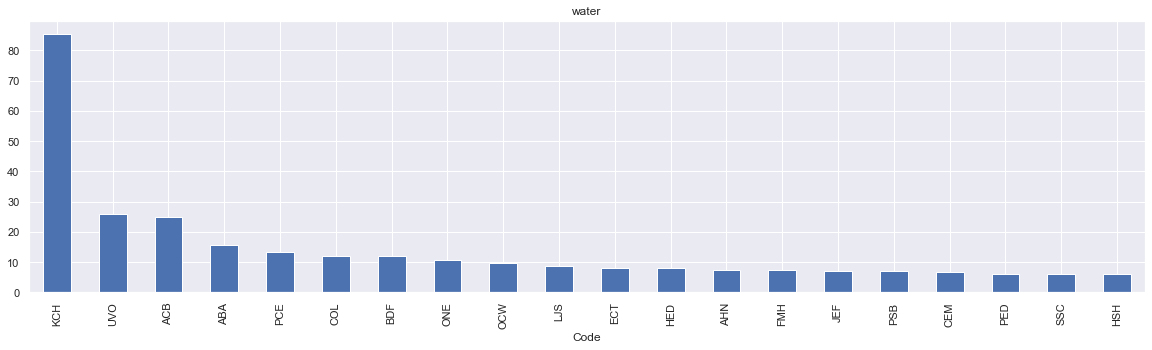

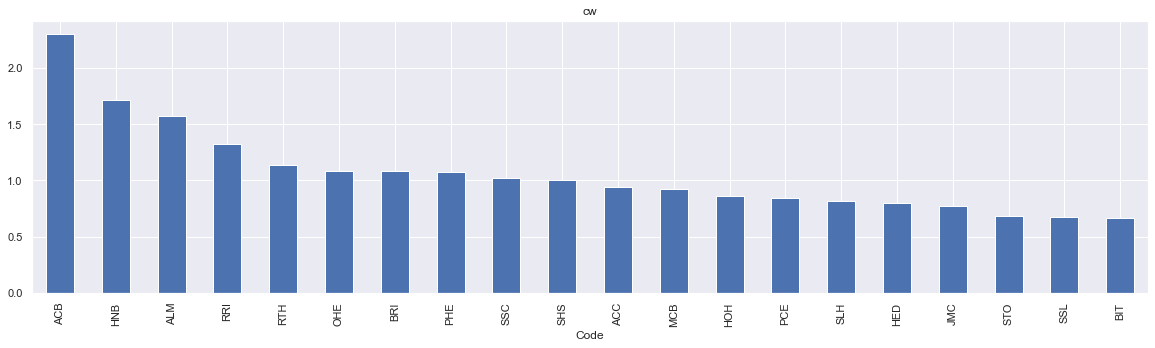

In [167]:
for col in ["elec", "ng", "water", "cw"]:
    df_agg.groupby("Code").mean()[col + "_per_sqft"].sort_values(ascending = False).head(20).plot(kind = "bar")
    plt.title(col)
    plt.show()

# Room

In [168]:
df_room = pd.read_excel("Room wise.xlsx", sheet_name = "Summary", skiprows = 2)

In [169]:
df_room.fillna(0, inplace = True)

In [170]:
df_room.to_excel("Room.xlsx")

In [171]:
df_room

,Room_Type,Energy Usage,sq_feet_1,elec_per_sqft,Gas usage,sq_feet_2,gas_per_sqft,Water,sq_feet_3,water_per_sqft,Chilled Water,sq_feet_4,cw_per_sqft
0,OFFICE,23032506.947657,1075445,21.416722,525644.161378,950202.000000,0.553192,42924.852127,1081932,0.039674,4632381.833425,680455,6.807771
1,LAB,12491686.190277,426278,29.304084,347899.685422,400685.000000,0.868262,19202.476073,426650,0.045008,3354667.140373,335571,9.996892
2,OM*MECH,7136298.880702,230240,30.995044,126226.254986,201858.000000,0.625322,13238.457765,240632,0.055015,781608.857464,138466,5.644771
3,OM*CORR,6165541.746708,304004,20.281120,180085.357024,299919.000000,0.600447,12073.952113,320166,0.037712,1260835.250345,186604,6.756743
4,STACK,4662503.450883,153689,30.337262,41003.736456,140941.000000,0.290928,6224.457994,143164,0.043478,394760.609410,80169,4.924105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,PATIENT,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000
162,PORCH,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000
163,RECORDS,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000
164,RETAIL,0.000000,0,0.000000,9898.855486,93441.000000,0.105937,9245.835676,93441,0.098948,0.000000,0,0.000000


In [172]:
df_room.set_index("Room_Type", inplace = True)

<AxesSubplot:ylabel='Room_Type'>

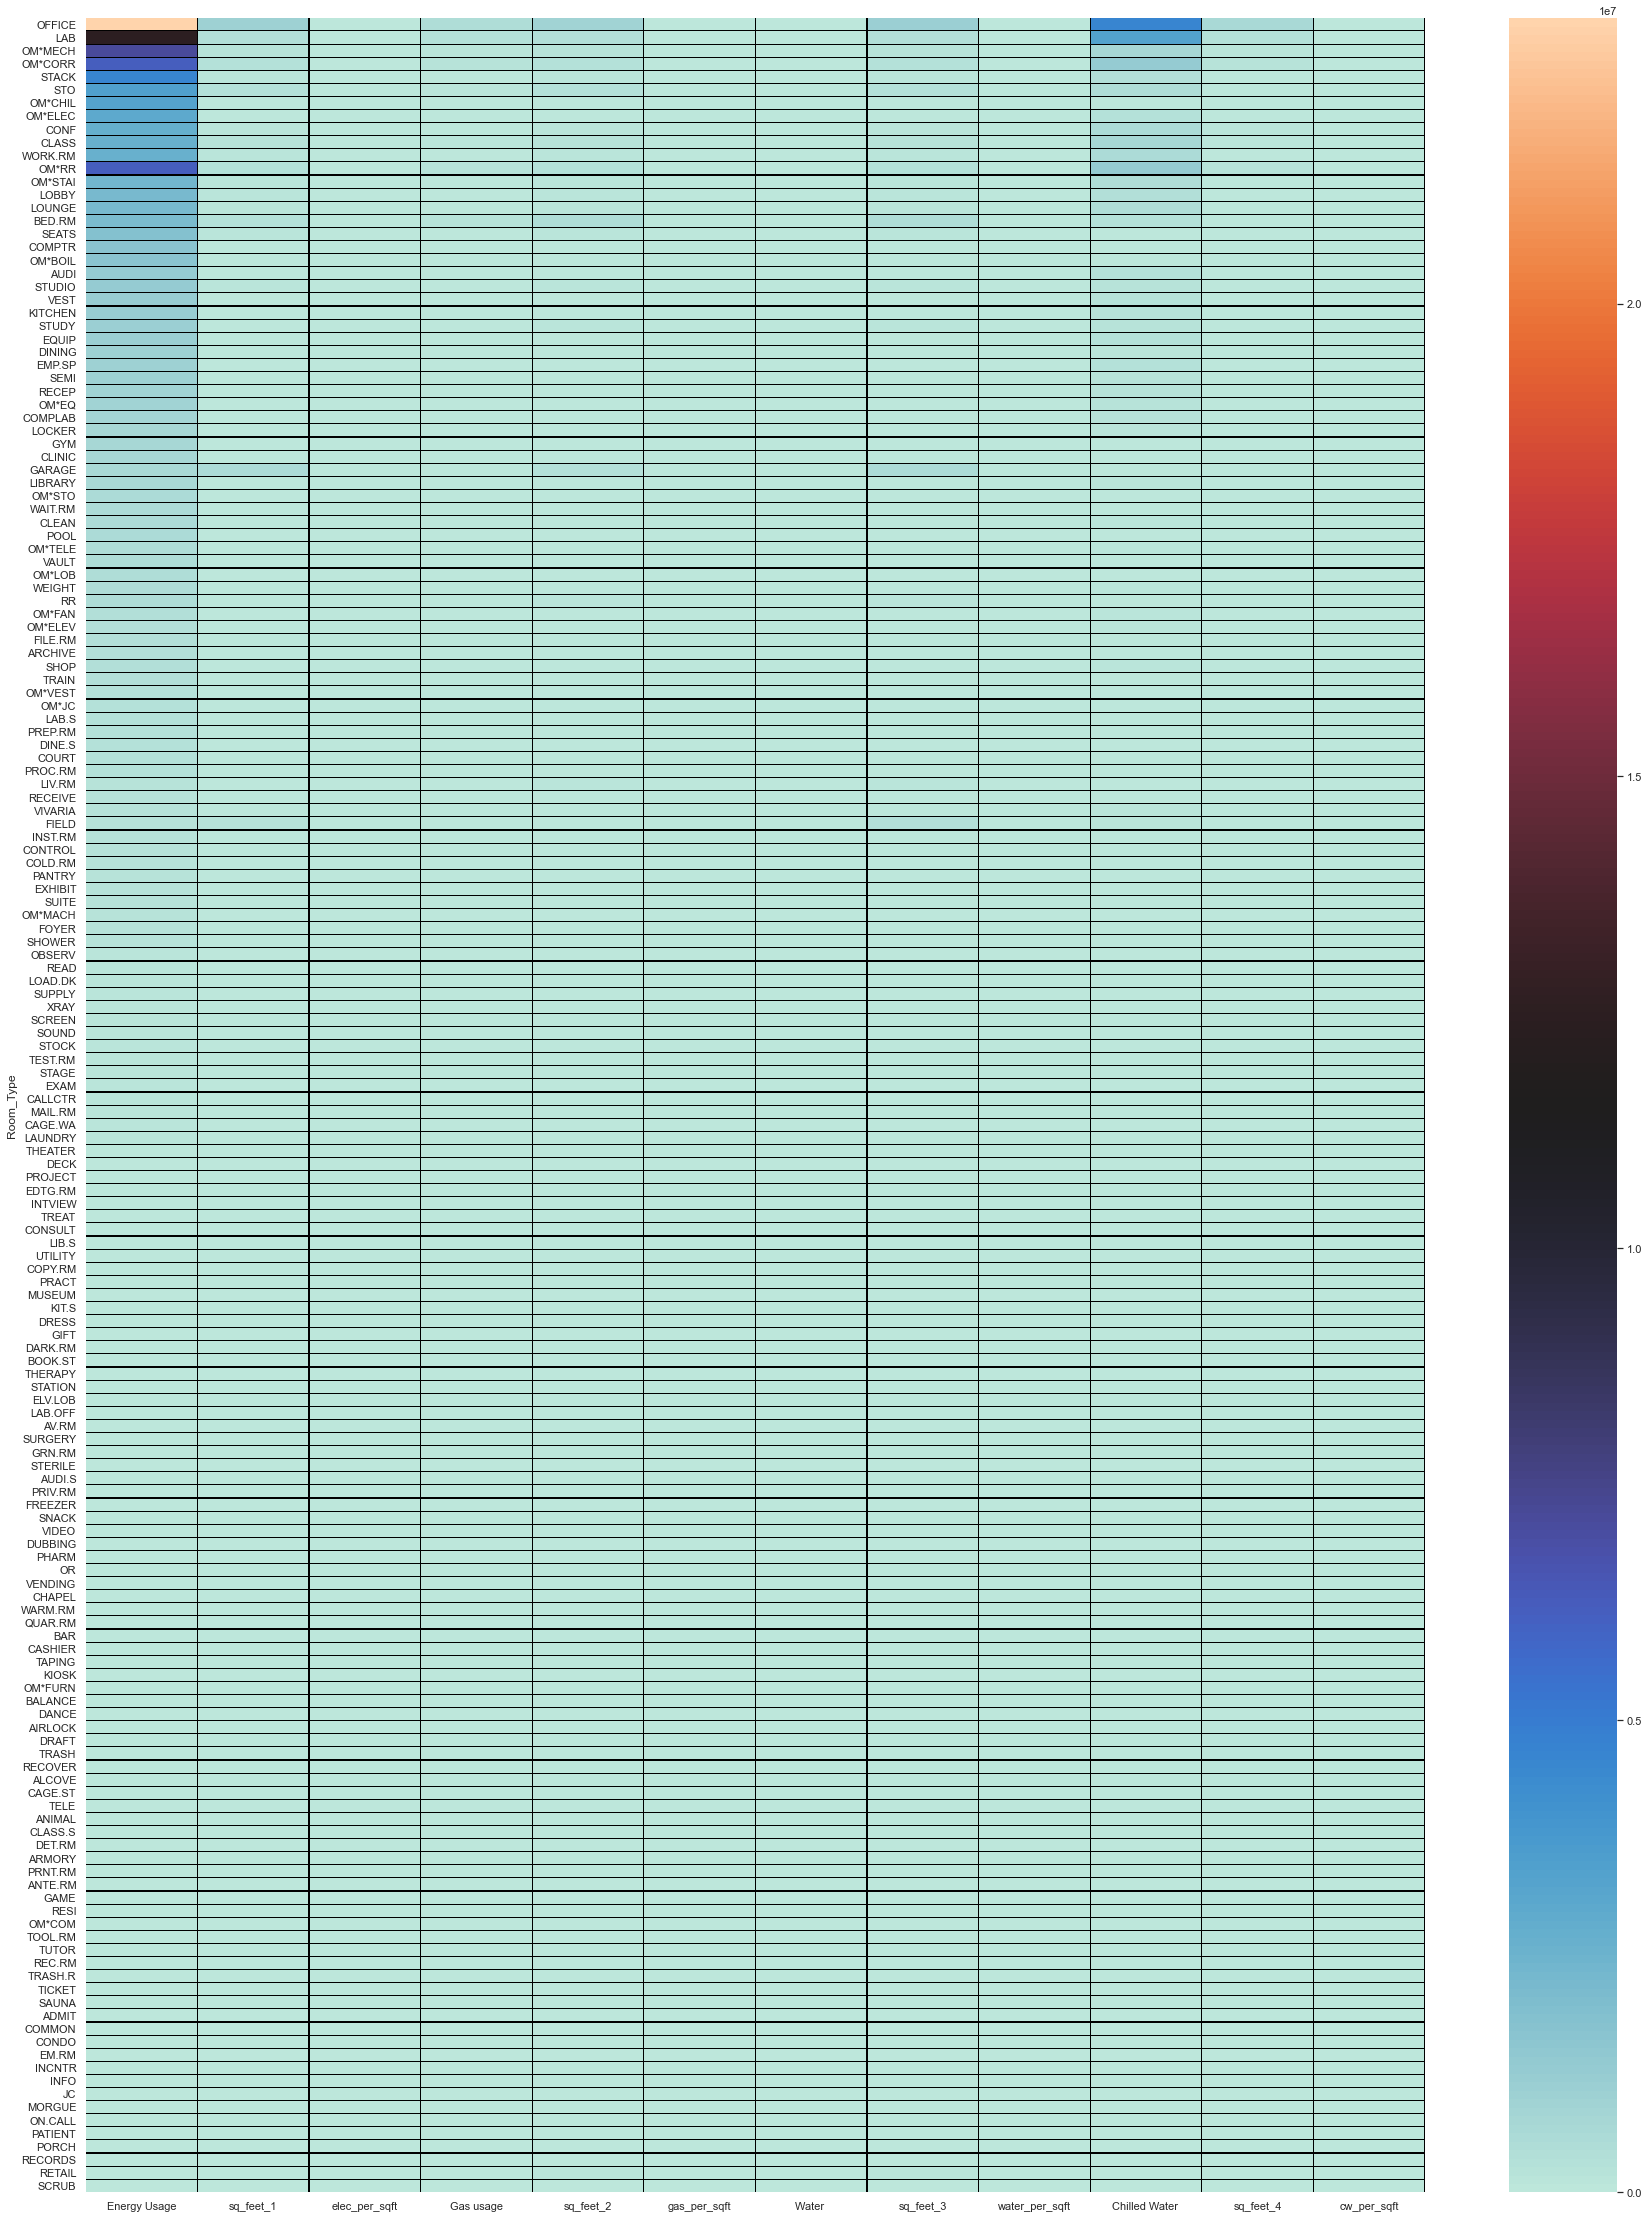

In [173]:
sns.set(rc = {'figure.figsize':(30,40)})

sns.heatmap(df_room, cmap="icefire" , linecolor = "black", linewidths=0.1)

# Resource Consumption Over Years

In [174]:
df_elec["year"] = df_elec.date.dt.year

df = pd.DataFrame(df_elec.groupby("year").sum()["elec"])

df.to_excel("elec_year_wise.xlsx")

In [175]:
df_cw["year"] = df_cw.date.dt.year

df = pd.DataFrame(df_cw.groupby("year").sum()["cw"]).reset_index()
df.to_excel("cw_year_wise.xlsx")

In [176]:
df_ng["year"] = df_ng.date.dt.year

df = pd.DataFrame(df_ng.groupby("year").sum()["ng"]).reset_index()
df.to_excel("ng_year_wise.xlsx")

In [177]:
df_water["year"] = df_water.date.dt.year

df = pd.DataFrame(df_water.groupby("year").sum()["water"]).reset_index()
df.to_excel("water_year_wise.xlsx")

# Get building type based on max area by room type

In [178]:
df = pd.read_excel("UPC Reference Data New.xlsx", sheet_name = "Room Types Sq Ft", index_col= 0)

In [179]:
df = df.drop(["Grand Total"], axis = 1)
df = df.drop(["BUILDING", "Grand Total"], axis = 0)
df_max = df["Max_val"]
df = df.drop(["Max_val"], axis = 1)

In [180]:
df_max

ROOM TYPE
SUN     2197
ABA     2344
ABM     2794
ABP     6000
ABX     2409
       ...  
WPH    17446
WTO    27442
ZHS    25587
ZMT     1442
ZNI    36062
Name: Max_val, Length: 372, dtype: int64

In [181]:
df

,ADMIT,AIRLOCK,ALCOVE,ANIMAL,ANTE.RM,ARCHIVE,ARMORY,AUDI,AUDI.S,AV.RM,...,VAULT,VENDING,VEST,VIDEO,VIVARIA,WAIT.RM,WARM.RM,WEIGHT,WORK.RM,XRAY
ROOM TYPE,,,,,,,,,,,,,,,,,,,,,
SUN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABM,0,0,0,0,0,0,0,0,0,0,...,0,0,78,0,0,518,0,0,242,0
ABP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPH,0,0,0,0,0,0,0,1228,0,0,...,0,0,0,0,0,1416,0,0,3191,0
WTO,0,0,0,0,0,0,0,0,0,0,...,0,0,6100,0,0,0,0,0,0,0
ZHS,0,0,0,0,0,0,0,0,0,15,...,0,0,229,0,0,229,28,0,1910,0


In [182]:
# find building type
l = list()

for i in range(df.shape[0]):
    val = list((df.iloc[i] == df_max.iloc[i]).values).index(True)
    l.append(df.columns[val])

In [183]:
df["building_type"] = l


In [184]:
df

,ADMIT,AIRLOCK,ALCOVE,ANIMAL,ANTE.RM,ARCHIVE,ARMORY,AUDI,AUDI.S,AV.RM,...,VENDING,VEST,VIDEO,VIVARIA,WAIT.RM,WARM.RM,WEIGHT,WORK.RM,XRAY,building_type
ROOM TYPE,,,,,,,,,,,,,,,,,,,,,
SUN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LIV.RM
ABA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CLASS
ABM,0,0,0,0,0,0,0,0,0,0,...,0,78,0,0,518,0,0,242,0,OFFICE
ABP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LAB
ABX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPH,0,0,0,0,0,0,0,1228,0,0,...,0,0,0,0,1416,0,0,3191,0,OFFICE
WTO,0,0,0,0,0,0,0,0,0,0,...,0,6100,0,0,0,0,0,0,0,BED.RM
ZHS,0,0,0,0,0,0,0,0,0,15,...,0,229,0,0,229,28,0,1910,0,LAB


## Join

In [185]:
df_type = df.reset_index()[["ROOM TYPE", "building_type"]]

In [186]:
df_new = pd.merge(df_new, df_type, how = "left", left_on = "Code", right_on = "ROOM TYPE")
df_new.drop("ROOM TYPE", axis = 1, inplace = True)
df_new.fillna({"building_type": "Novalue"}, inplace = True)


In [187]:
df_new.to_excel("Master.xlsx")

## get sq feet values by building type

In [188]:
df = pd.read_excel("UPC Reference Data New.xlsx", sheet_name = "Room Types Sq Ft", index_col= 0)

In [189]:
df = df.transpose()

df.drop(["Grand Total", "Max_val"], axis = 0, inplace = True)
df.drop(["BUILDING"], axis = 1, inplace = True)

df = df.reset_index()

df.rename(columns = {"index": "buil_type"}, inplace = True)



In [190]:
df_buil_sqft = df.reset_index()[["buil_type", "Grand Total"]]

df_buil_sqft

ROOM TYPE,buil_type,Grand Total
0,ADMIT,1104
1,AIRLOCK,181
2,ALCOVE,981
3,ANIMAL,1853
4,ANTE.RM,2681
...,...,...
143,WAIT.RM,177856
144,WARM.RM,309
145,WEIGHT,27566
146,WORK.RM,290512


In [191]:
df_new = pd.merge(df_new, df_buil_sqft, how = "left", left_on = "building_type", right_on = "buil_type" )

df_new.drop(["buil_type"], axis = 1, inplace = True)

df_new.rename(columns = {"Grand Total": "buil_type_sqft"}, inplace = True)

df_new.fillna({"buil_type_sqft": -1}, inplace = True)

df_new

,Code,date,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,building_type,buil_type_sqft
0,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2014,0.500000,Novalue,-1.000000
1,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2015,0.510000,Novalue,-1.000000
2,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2016,0.380000,Novalue,-1.000000
3,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2017,0.350000,Novalue,-1.000000
4,ABA,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3338.000000,0.000000,0.000000,0.000000,0.000000,2018,0.350000,CLASS,386169.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2056,0.013231,Novalue,-1.000000
8871,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2057,0.012151,Novalue,-1.000000
8872,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2058,0.011160,Novalue,-1.000000
8873,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2059,0.010250,Novalue,-1.000000


In [192]:
# per sq feet usage on building type
for col in ["elec", "ng", "water", "cw"]:
    df_new[col + "_per_sqft_buil_type"] = df_new[col]/df_new["buil_type_sqft"]

In [193]:
df_new

,Code,date,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,building_type,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type
0,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2014,0.500000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2015,0.510000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2016,0.380000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2017,0.350000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
4,ABA,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3338.000000,0.000000,0.000000,0.000000,0.000000,2018,0.350000,CLASS,386169.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2056,0.013231,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8871,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2057,0.012151,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8872,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2058,0.011160,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8873,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2059,0.010250,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [194]:
df_new.to_excel("Master.xlsx")

# Get a few stats

In [195]:
# not electricity, that's just df name. It's overall group by
elec = df_new.groupby("Code").sum()

In [196]:
print("top", (elec[elec["elec_per_sqft"] > 0].sort_values(by = "elec_per_sqft", ascending = False).head(3)["elec_per_sqft"]/elec[elec["elec_per_sqft"] > 0]["elec_per_sqft"].sum()).sum())

top 0.282759711856622


In [197]:
print("top", (elec[elec["ng_per_sqft"] > 0].sort_values(by = "ng_per_sqft", ascending = False).head(1)["ng_per_sqft"]/elec[elec["ng_per_sqft"] > 0]["ng_per_sqft"].sum()).sum())

top 0.10481600173964173


In [198]:
print("top", (elec[elec["cw_per_sqft"] > 0].sort_values(by = "cw_per_sqft", ascending = False).head(3)["cw_per_sqft"]/elec[elec["cw_per_sqft"] > 0]["cw_per_sqft"].sum()).sum())

top 0.14193201497208277


In [199]:
print("top", (elec[elec["water_per_sqft"] > 0].sort_values(by = "water_per_sqft", ascending = False).head(1)["water_per_sqft"]/elec[elec["water_per_sqft"] > 0]["water_per_sqft"].sum()).sum())

top 0.14917371199088145


# Total stats

In [200]:
df_new

,Code,date,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,building_type,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type
0,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2014,0.500000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2015,0.510000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2016,0.380000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2017,0.350000,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
4,ABA,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3338.000000,0.000000,0.000000,0.000000,0.000000,2018,0.350000,CLASS,386169.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2056,0.013231,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8871,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2057,0.012151,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8872,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2058,0.011160,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000
8873,Novalue,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2059,0.010250,Novalue,-1.000000,-0.000000,-0.000000,-0.000000,-0.000000


## by building name

In [201]:

df = df_new.groupby("Code").mean()

In [202]:
df["ng_per_sqft"] = df["ng_per_sqft"]*29.3
df["cw_per_sqft"] = df["cw_per_sqft"]*3.516

df["total_per_sqft"] = df["ng_per_sqft"] + df["cw_per_sqft"] + df["elec_per_sqft"]

In [203]:
df.to_excel("total_usage.xlsx")

In [204]:
df.loc["UVO", "total_per_sqft"]/df[df["total_per_sqft"] > 0]["total_per_sqft"].sum()

0.08928545183478163

In [205]:
df[df["total_per_sqft"] > 0]["total_per_sqft"].sum()

635.118900577584

In [206]:
# check building type for top 20

df_code = df_new.groupby("Code").mean().reset_index()

df_new.groupby("Code").agg(pd.Series.mode)[["building_type"]].reset_index()

,Code,building_type
0,ABA,CLASS
1,ACB,LAB
2,ACC,OFFICE
3,ADM,OFFICE
4,AES,CLASS
...,...,...
180,WAH,STUDIO
181,WPH,OFFICE
182,WTO,BED.RM
183,YWC,Novalue


In [207]:
df_code = pd.merge(df_code, df_new.groupby("Code").agg(pd.Series.mode)["building_type"], how = "left", left_on = "Code", right_on = "Code")

In [208]:
# sort and find top values

df_code["ng_per_sqft"] = df_code["ng_per_sqft"]*29.3
df_code["cw_per_sqft"] = df_code["cw_per_sqft"]*3.516

df_code["total_per_sqft"] = df_code["ng_per_sqft"] + df_code["cw_per_sqft"] + df_code["elec_per_sqft"]

df_code = df_code.sort_values(by = "total_per_sqft", ascending = False)

In [209]:
#display
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).head(30)

,Code,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type,building_type,total_per_sqft
176,UVO,953307.357667,15711.208333,644678.438889,0.000000,24929.000000,38.240898,18.465980,25.860582,0.000000,2019.500000,0.305000,1918755.000000,0.496836,0.008188,0.335988,0.000000,OFFICE,56.706878
122,PSA,607569.346666,0.000000,109010.461932,0.000000,18295.000000,33.209584,0.000000,5.958484,0.000000,2019.500000,0.305000,606004.000000,1.002583,0.000000,0.179884,0.000000,STO,33.209584
47,EPS,20982.584514,0.000000,0.000000,0.000000,1094.000000,19.179693,0.000000,0.000000,0.000000,2019.500000,0.305000,606004.000000,0.034624,0.000000,0.000000,0.000000,STO,19.179693
1,ACB,138341.239205,2406.812456,607538.515438,56045.346414,24319.000000,5.688607,2.899774,24.982052,8.102942,2019.500000,0.305000,787697.000000,0.175627,0.003056,0.771285,0.071151,LAB,16.691323
148,SHP,24758.179930,0.000000,0.000000,0.000000,1567.000000,15.799732,0.000000,0.000000,0.000000,2019.500000,0.305000,606004.000000,0.040855,0.000000,0.000000,0.000000,STO,15.799732
171,UPV,43265.595106,0.000000,0.000000,0.000000,2843.000000,15.218289,0.000000,0.000000,0.000000,2019.500000,0.305000,9560.000000,4.525690,0.000000,0.000000,0.000000,VAULT,15.218289
134,RRI,431164.374433,15164.740689,370270.064835,129464.132659,97943.000000,4.402197,4.536587,3.780465,4.647559,2019.500000,0.305000,787697.000000,0.547373,0.019252,0.470067,0.164358,LAB,13.586343
153,SSC,276696.489022,6856.237842,397708.606694,66283.633352,64980.000000,4.258179,3.091532,6.120477,3.586538,2019.500000,0.305000,787697.000000,0.351273,0.008704,0.504900,0.084149,LAB,10.936250
92,LHI,113940.173561,3210.215723,98269.788606,10724.465842,23114.000000,4.929487,4.069366,4.251527,1.631359,2019.500000,0.305000,787697.000000,0.144650,0.004075,0.124756,0.013615,LAB,10.630212
68,HNB,97102.454775,4961.526922,218245.758727,99441.123114,58016.000000,1.673719,2.505735,3.761820,6.026527,2019.500000,0.305000,787697.000000,0.123274,0.006299,0.277068,0.126243,LAB,10.205981


In [221]:
#display
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).head(5)["total_per_sqft"].sum()/df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False)["total_per_sqft"].sum()

0.22293024262276406

In [220]:
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False)["total_per_sqft"].sum()

635.118900577584

In [210]:
df_code = pd.merge(df_code, df_eui[["Code", "Primary_property"]], how = "left", left_on = "Code", right_on = "Code")

In [211]:
# to excel
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).head(30).to_excel("top_30.xlsx")

In [212]:
# check proportion
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).head(30).building_type.value_counts()

LAB        12
OFFICE     10
STO         3
VAULT       1
DINING      1
KITCHEN     1
POOL        1
GYM         1
Name: building_type, dtype: int64

In [213]:
df_code[df_code["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).head(30).Primary_property.value_counts()

College/University                14
Laboratory                         4
Parking                            2
Other                              1
Office                             1
Fitness Center/Health Club/Gym     1
Name: Primary_property, dtype: int64

In [216]:
# for water

df_code[df_code["water_per_sqft"] > 0].sort_values(by = "water_per_sqft", ascending = False).head(30)

,Code,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type,building_type,total_per_sqft,Primary_property
52,KCH,0.000000,339.916667,213956.726546,0.000000,2501.000000,0.000000,3.982230,85.548471,0.000000,2019.500000,0.305000,1918755.000000,0.000000,0.000177,0.111508,0.000000,OFFICE,3.982230,NaN
0,UVO,953307.357667,15711.208333,644678.438889,0.000000,24929.000000,38.240898,18.465980,25.860582,0.000000,2019.500000,0.305000,1918755.000000,0.496836,0.008188,0.335988,0.000000,OFFICE,56.706878,NaN
3,ACB,138341.239205,2406.812456,607538.515438,56045.346414,24319.000000,5.688607,2.899774,24.982052,8.102942,2019.500000,0.305000,787697.000000,0.175627,0.003056,0.771285,0.071151,LAB,16.691323,College/University
140,ABA,204.458333,0.000000,52360.351688,0.000000,3338.000000,0.061252,0.000000,15.686145,0.000000,2019.500000,0.305000,386169.000000,0.000529,0.000000,0.135589,0.000000,CLASS,0.061252,NaN
13,PCE,41320.281699,2026.695179,209758.218807,13112.659732,15572.000000,2.653499,3.813394,13.470217,2.960706,2019.500000,0.305000,787697.000000,0.052457,0.002573,0.266293,0.016647,LAB,9.427598,Laboratory
43,COL,37678.386099,627.747107,148101.492816,0.000000,12259.000000,3.073529,1.500366,12.081042,0.000000,2019.500000,0.305000,863773.000000,0.043621,0.000727,0.171459,0.000000,BED.RM,4.573895,NaN
114,BDF,30945.554947,56.221559,314554.208427,0.000000,26157.000000,1.183070,0.062977,12.025623,0.000000,2019.500000,0.305000,111179.000000,0.278340,0.000506,2.829259,0.000000,SEATS,1.246047,Office
130,ONE,5019.496409,0.000000,99418.744566,0.000000,9335.000000,0.537707,0.000000,10.650107,0.000000,2019.500000,0.305000,57094.000000,0.087916,0.000000,1.741317,0.000000,ARCHIVE,0.537707,NaN
38,OCW,18839.550900,933.086795,120593.250813,3770.275733,12209.000000,1.543087,2.239286,9.877406,1.085780,2019.500000,0.305000,787697.000000,0.023917,0.001185,0.153096,0.004786,LAB,4.868153,NaN
18,LJS,40006.379073,1240.233209,132206.910049,9690.901198,14968.000000,2.672794,2.427768,8.832637,2.276404,2019.500000,0.305000,787697.000000,0.050789,0.001575,0.167840,0.012303,LAB,7.376966,NaN


## Stats by building type

In [93]:
df = df_new.groupby("building_type").sum()

In [94]:
df["ng_per_sqft_buil_type"] = df["ng_per_sqft_buil_type"]*29.3
df["cw_per_sqft_buil_type"] = df["cw_per_sqft_buil_type"]*3.516

df["total_per_sqft"] = df["elec_per_sqft_buil_type"] + df["ng_per_sqft_buil_type"] + df["cw_per_sqft_buil_type"]

In [95]:
df[df["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False)

,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type,total_per_sqft
building_type,,,,,,,,,,,,,,,,,
GYM,28448751.140359,886207.882604,44216515.006344,0.000000,9503232.000000,268.636060,9.662235,402.418312,0.000000,193872,29.280000,6901920.000000,395.698604,361.164072,615.015161,0.000000,756.862676
LAB,144014597.341683,4277494.544627,216171842.050933,39039676.760756,47602704.000000,2782.153366,75.803915,5752.474581,705.383591,1938720,292.800000,756189120.000000,182.829943,159.110153,274.435274,174.259269,516.199365
POOL,4903834.346080,269405.393074,8601169.464192,0.000000,2174928.000000,108.226134,5.945695,189.825196,0.000000,96936,14.640000,1383888.000000,170.088944,273.787868,298.330598,0.000000,443.876812
BOOK.ST,2854787.889801,100219.537946,2355634.380544,922865.561810,2404080.000000,56.998860,2.000989,47.032732,18.425987,96936,14.640000,1227840.000000,111.602341,114.794076,92.088912,126.848918,353.245335
SEATS,23605792.107362,465116.863997,55139206.049902,27620.175393,11809584.000000,201.163319,3.718731,800.150004,1.356990,290808,43.920000,16009776.000000,212.322400,122.576423,495.949829,0.873479,335.772302
STUDIO,14776012.412008,486762.141461,18150836.471773,2671012.140979,11956512.000000,417.967554,10.177672,546.716655,51.418735,581616,87.840000,35868384.000000,118.641854,114.515715,145.739515,75.405914,308.563483
CLINIC,16659789.245118,306896.090429,19134427.072119,0.000000,7809552.000000,102.396384,1.886281,117.606298,0.000000,96936,14.640000,4375440.000000,182.763307,98.645773,209.910889,0.000000,281.409080
OFFICE,234866195.938102,4454770.498863,307457145.125110,32734893.162335,107928144.000000,5210.718701,107.346169,12225.157165,749.511979,5234544,790.560000,4973412960.000000,122.405516,68.025764,160.237834,59.984669,250.415950
VAULT,2076748.565071,0.000000,0.000000,0.000000,136464.000000,730.477863,0.000000,0.000000,0.000000,96936,14.640000,458880.000000,217.233114,0.000000,0.000000,0.000000,217.233114


## Stats proportion by building

In [106]:
# stats proportion

df_stats = df[df["total_per_sqft"] > 0].sort_values(by = "total_per_sqft", ascending = False).sort_values(by = "total_per_sqft", ascending = False)

In [110]:
df_stats.reset_index()

,index,building_type,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type,total_per_sqft
0,13,GYM,28448751.140359,886207.882604,44216515.006344,0.000000,9503232.000000,268.636060,9.662235,402.418312,0.000000,193872,29.280000,6901920.000000,395.698604,361.164072,615.015161,0.000000,756.862676
1,15,LAB,144014597.341683,4277494.544627,216171842.050933,39039676.760756,47602704.000000,2782.153366,75.803915,5752.474581,705.383591,1938720,292.800000,756189120.000000,182.829943,159.110153,274.435274,174.259269,516.199365
2,20,POOL,4903834.346080,269405.393074,8601169.464192,0.000000,2174928.000000,108.226134,5.945695,189.825196,0.000000,96936,14.640000,1383888.000000,170.088944,273.787868,298.330598,0.000000,443.876812
3,3,BOOK.ST,2854787.889801,100219.537946,2355634.380544,922865.561810,2404080.000000,56.998860,2.000989,47.032732,18.425987,96936,14.640000,1227840.000000,111.602341,114.794076,92.088912,126.848918,353.245335
4,22,SEATS,23605792.107362,465116.863997,55139206.049902,27620.175393,11809584.000000,201.163319,3.718731,800.150004,1.356990,290808,43.920000,16009776.000000,212.322400,122.576423,495.949829,0.873479,335.772302
5,28,STUDIO,14776012.412008,486762.141461,18150836.471773,2671012.140979,11956512.000000,417.967554,10.177672,546.716655,51.418735,581616,87.840000,35868384.000000,118.641854,114.515715,145.739515,75.405914,308.563483
6,5,CLINIC,16659789.245118,306896.090429,19134427.072119,0.000000,7809552.000000,102.396384,1.886281,117.606298,0.000000,96936,14.640000,4375440.000000,182.763307,98.645773,209.910889,0.000000,281.409080
7,19,OFFICE,234866195.938102,4454770.498863,307457145.125110,32734893.162335,107928144.000000,5210.718701,107.346169,12225.157165,749.511979,5234544,790.560000,4973412960.000000,122.405516,68.025764,160.237834,59.984669,250.415950
8,30,VAULT,2076748.565071,0.000000,0.000000,0.000000,136464.000000,730.477863,0.000000,0.000000,0.000000,96936,14.640000,458880.000000,217.233114,0.000000,0.000000,0.000000,217.233114
9,14,KITCHEN,20850872.995562,575125.488489,5289862.036942,2629161.790458,4938528.000000,202.659963,5.589930,51.414790,25.554126,96936,14.640000,10921680.000000,91.638091,74.059713,23.248564,40.627301,206.325105


In [114]:
df_stats.reset_index()["total_per_sqft"][0]/df_stats.total_per_sqft.sum()

0.1573254599377418

In [116]:
df_stats.reset_index()["total_per_sqft"][1]/df_stats.total_per_sqft.sum()

0.10729991719055193

In [119]:
df_stats.reset_index()["total_per_sqft"][7]/df_stats.total_per_sqft.sum()

0.05205277751571301

In [125]:
df_new.groupby("Code").mean()

,elec,ng,water,cw,Sq_feet,elec_per_sqft,ng_per_sqft,water_per_sqft,cw_per_sqft,Year,LADWP_Carbon_Intensity,buil_type_sqft,elec_per_sqft_buil_type,ng_per_sqft_buil_type,water_per_sqft_buil_type,cw_per_sqft_buil_type
Code,,,,,,,,,,,,,,,,
ABA,204.458333,0.000000,52360.351688,0.000000,3338.000000,0.061252,0.000000,15.686145,0.000000,2019.500000,0.305000,386169.000000,0.000529,0.000000,0.135589,0.000000
ACB,138341.239205,2406.812456,607538.515438,56045.346414,24319.000000,5.688607,0.098968,24.982052,2.304591,2019.500000,0.305000,787697.000000,0.175627,0.003056,0.771285,0.071151
ACC,35374.366444,1444.518400,92657.219541,30538.469835,32592.000000,1.085370,0.044321,2.842944,0.936993,2019.500000,0.305000,1918755.000000,0.018436,0.000753,0.048290,0.015916
ADM,59971.061788,3619.528482,136010.557604,17744.454015,79112.000000,0.758053,0.045752,1.719215,0.224295,2019.500000,0.305000,1918755.000000,0.031255,0.001886,0.070885,0.009248
AES,0.000000,0.000000,0.000000,0.000000,8437.000000,0.000000,0.000000,0.000000,0.000000,2019.500000,0.305000,386169.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAH,92217.846941,3600.703514,72263.669628,25181.200526,79017.000000,1.167063,0.045569,0.914533,0.318681,2019.500000,0.305000,124543.000000,0.740450,0.028911,0.580231,0.202189
WPH,109235.667733,2187.626061,218192.318646,0.000000,66682.000000,1.638158,0.032807,3.272132,0.000000,2019.500000,0.305000,1918755.000000,0.056930,0.001140,0.113716,0.000000
WTO,50562.287255,2413.865746,345655.438696,0.000000,80916.000000,0.624874,0.029832,4.271781,0.000000,2019.500000,0.305000,863773.000000,0.058537,0.002795,0.400169,0.000000
